# Imports

In [32]:
import numpy as np
import pandas as po
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
cd drive/MyDrive/Open\ IIT\ DA\ 2021/

[Errno 2] No such file or directory: 'drive/MyDrive/Open IIT DA 2021/'
/content/drive/MyDrive/Open IIT DA 2021


In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preprocessing Function

In [36]:
pop_dict = {'very low': 1, 'low': 2, 'average': 3, 'high': 4, 'very high': 5}
mode_dict = {'Minor': 1, 'Major': 2}
explicit_dict = {'No': 1, 'Yes': 2}

In [37]:
def revenue(Y_test, Y_pred):
  revenue = 10000
  i = 0
  while i < len(Y_test) and revenue >= 0:
    if Y_test[i] <= Y_pred[i]:
      revenue += Y_test[i]*2 - Y_pred[i]
    i += 1
  return revenue 

In [38]:
po.options.mode.chained_assignment = None  # default='warn'

## Functions for new features

In [39]:
def get_year_band(data):
    year_band = []
    for i in range(len(data)):
        value = 0
        if data.iloc[i]["year"]<=2030:
          value = 1
        if data.iloc[i]["year"]<=2010:
          value = 2
        if data.iloc[i]["year"]<=2000:
          value = 3
        if data.iloc[i]["year"]<=1980:
          value = 4
        if data.iloc[i]["year"]<=1970:
          value = 5
        if data.iloc[i]["year"]<=1960:
          value = 6
        if data.iloc[i]["year"]<=1950:
          value = 7
        if data.iloc[i]["year"]<=1940:
          value = 8
        if data.iloc[i]["year"]<=1930:
          value = 9
        
        year_band.append(value)
    
    return year_band

In [40]:
def get_month_band(data):
    month_band = []
    for i in range(len(data)):
        value = 0
        if data.iloc[i]['month']<=12:
          value = 1
        if data.iloc[i]['month']<=10:
          value = 2
        if data.iloc[i]['month']<=8:
          value = 3
        if data.iloc[i]['month']<=7:
          value = 4
        if data.iloc[i]['month']<=5:
          value = 5
        if data.iloc[i]['month']<=4:
          value = 6
        if data.iloc[i]['month']<=3:
          value = 7
        if data.iloc[i]['month']<=2:
          value = 8
        
        month_band.append(value)
    
    return month_band

In [41]:
def transform_loudness(data):
    data2=data.copy()
    
    x="loudness"
    bins=[]
    bins.append(data2[x].min()-1)
    bins.append(data2[x].mean()-3.5*data2[x].std())
    bins.append(data2[x].mean()-3*data2[x].std())
    bins.append(data2[x].mean()-2.5*data2[x].std())
    bins.append(data2[x].mean()-2*data2[x].std())
    bins.append(data2[x].mean()-1.5*data2[x].std())
    bins.append(data2[x].mean()-1*data2[x].std())
    bins.append(data2[x].mean()-0.5*data2[x].std())
    bins.append(data2[x].mean())
    bins.append(data2[x].mean()+0.5*data2[x].std())
    bins.append(data2[x].mean()+1.5*data2[x].std())
    bins.append(data2[x].max())

    labels = [1,2,3,4,5,6,7,8,9,10,11]
    data2["loudness"]=po.cut(data2["loudness"], bins=bins, labels=labels).astype('int')

    return data2["loudness"]

## Main Preprocess Function

In [52]:
def preprocess(data):

  # Label Encode Features
  if "popularity" in data:
    data["popularity"] = data["popularity"].apply(lambda x: pop_dict[x])

  data["mode"] = data["mode"].apply(lambda x: mode_dict[x])
  data["explicit"] = data["explicit"].apply(lambda x: explicit_dict[x])

  # Add new features
  data["day_of_week"] = data["release_date"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y").weekday())
  data["day_of_month"] = data["release_date"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y").day)
  data["week_of_year"] = data["release_date"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y").isocalendar()[1])
  data["month"] = data["release_date"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y").month)
  data["year"] = data["release_date"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y").year)
  data["is_weekend"] = data["day_of_week"].apply(lambda x: 1 if x>=5 else 0)
  data["year_band"] = get_year_band(data)
  data["month_band"] = get_month_band(data)
  data["loudness"] = transform_loudness(data)

  data = data.drop(["release_date", "id"], axis=1)

  return data

In [53]:
df_train = preprocess(po.read_csv('Dataset/Train_data.csv').sample(frac=1, random_state=69).reset_index(drop=True))

In [54]:
df_train

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity,day_of_week,day_of_month,week_of_year,month,is_weekend,year_band,month_band
0,0.0578,0.601,0.677,1,0.004780,10,0.0721,9,1,0.1290,136.421,0.790,1985,3.7,2,1,1,1,1,0,3,8
1,0.0118,0.561,0.964,2,0.000004,1,0.8750,10,2,0.5220,160.088,0.452,2020,2.0,4,4,26,26,6,0,1,4
2,0.3120,0.651,0.691,1,0.000000,0,0.2330,10,2,0.0706,147.049,0.661,2018,4.2,1,4,23,47,11,0,1,1
3,0.7060,0.543,0.182,1,0.000000,7,0.0924,7,2,0.0319,129.506,0.440,1972,3.1,2,5,1,52,1,1,4,8
4,0.4280,0.523,0.414,1,0.000012,7,0.2150,10,2,0.0310,92.007,0.608,1967,3.2,3,6,1,52,1,1,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.2950,0.803,0.715,1,0.000134,2,0.0574,10,2,0.2980,101.085,0.574,2019,3.3,5,3,7,45,11,0,1,1
12223,0.0670,0.746,0.744,2,0.000000,9,0.2790,10,2,0.2540,162.964,0.452,2017,3.1,4,4,14,15,4,0,1,6
12224,0.0301,0.772,0.878,2,0.000002,2,0.2510,10,2,0.3240,61.311,0.305,2020,2.3,5,4,7,6,2,0,1,8
12225,0.9770,0.476,0.247,1,0.941000,8,0.1090,6,2,0.0670,185.548,0.796,1956,2.9,1,6,1,52,1,1,6,8


In [55]:
df_train["popularity"].value_counts()

1    3222
2    3118
3    2912
4    2606
5     369
Name: popularity, dtype: int64

In [56]:
X = df_train.drop(['popularity'], axis=1)
y = df_train['popularity']

In [67]:
pwd

'/content/drive/My Drive/Open IIT DA 2021'

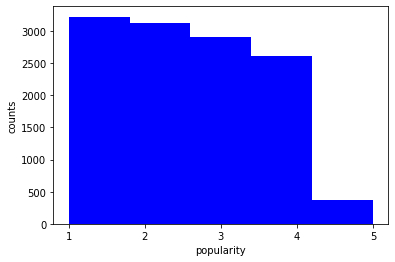

In [66]:
plt.hist(y, bins=5, color='blue')
plt.xlabel('popularity')
plt.ylabel('counts')
plt.xticks(list(range(1, 6)), labels=list(range(1, 6)))
plt.savefig('popularity_value_counts.png')
plt.show()

In [47]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

In [48]:
cols = list(df_train.columns)
cols.remove("popularity")

In [49]:
df_train = po.DataFrame(X, columns=cols)
df_train['popularity'] = y

In [ ]:
df_train.to_csv('Dataset/Train_data_3.csv', index=False)

## Test on SOTA model 

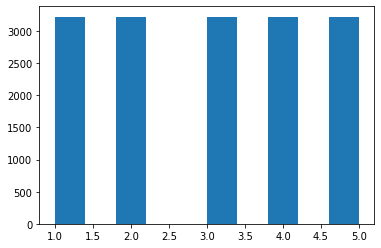

In [51]:
plt.hist(y, bins=5)
plt.show()

In [ ]:
score = make_scorer(revenue, greater_is_better=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000/len(X), random_state=69)

In [ ]:
clf = RandomForestClassifier(random_state=69, n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=69, verbose=0,
                       warm_start=False)

In [ ]:
clf = RandomForestClassifier(random_state=69, n_jobs=-1)
gs = GridSearchCV(clf, param_grid={'n_estimators': [200], "max_features": ["auto"]}, scoring=score, verbose=1, cv=3, n_jobs=-1)
gs = gs.fit(X_train,y_train) 
clf = gs.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.8s finished


In [ ]:
gs.best_params_

{'max_features': 'auto', 'n_estimators': 200}

In [ ]:
clf.feature_importances_

array([0.05939192, 0.04783388, 0.05281438, 0.01410632, 0.04748755,
       0.0285626 , 0.04279879, 0.03720481, 0.01110926, 0.04598097,
       0.04320682, 0.04209741, 0.21119655, 0.04600643, 0.02880657,
       0.0382708 , 0.03277774, 0.02855907, 0.0048492 , 0.11849987,
       0.01843906])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.82      0.84       800
           2       0.59      0.67      0.63       825
           3       0.53      0.51      0.52       774
           4       0.67      0.64      0.66       764
           5       0.94      0.93      0.93       837

    accuracy                           0.72      4000
   macro avg       0.72      0.71      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [ ]:
print(f1_score(y_test,y_pred,average='weighted')*100)
print(revenue(y_test, y_pred))

71.97028094121197
19215


# Testset

In [ ]:
df_test = preprocess(po.read_csv('Dataset/Test_data.csv').reset_index(drop=True))

In [ ]:
df_train.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,day_of_week,day_of_month,week_of_year,month,is_weekend,year_band,month_band,popularity
count,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000
mean,0.394611,0.580293,0.546204,1.158805,0.118383,5.324003,0.192907,8.664623,1.659497,0.099561,118.770418,0.525103,1991.847156,3.802159,2.821005,10.315010,28.122807,5.436458,0.141732,3.042503,4.966024,3.000000
std,0.354601,0.178083,0.248458,0.385226,0.272356,3.517958,0.164784,1.759509,0.488002,0.146394,30.494948,0.259126,26.585108,2.117198,1.834445,10.053269,19.669192,4.223845,0.349428,2.168788,2.913772,1.414257
min,-0.413219,-0.062333,-0.230906,0.501316,-0.454781,-2.553103,-0.306150,-1.727016,0.500241,-0.239011,0.000000,-0.403795,1920.000000,-0.391671,-2.383716,-1.187553,-0.902268,0.274433,-0.497123,0.516577,0.501659,1.000000
25%,0.065800,0.459000,0.355000,1.000000,0.000000,2.000000,0.094018,8.000000,1.000000,0.034900,94.953000,0.323000,1972.000000,2.996737,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,2.000000,2.000000
50%,0.286000,0.598000,0.573000,1.000000,0.000037,5.000000,0.130000,9.000000,2.000000,0.048200,116.867000,0.534297,1997.000000,3.500000,3.000000,7.000000,32.195892,5.000000,0.000000,3.000000,5.000000,3.000000
75%,0.737000,0.716000,0.742000,1.000000,0.014200,8.000000,0.245000,10.000000,2.000000,0.090900,136.864456,0.729000,2017.425680,4.200000,4.000000,19.000000,47.000000,10.000000,0.000000,4.000000,8.000000,4.000000
max,1.367774,1.161840,1.287283,2.495784,1.433386,14.459882,1.237141,12.242728,2.495842,0.968000,216.843000,1.246701,2026.767929,72.800000,6.729458,33.233084,53.497123,12.481912,1.498648,9.000000,8.457846,5.000000


In [ ]:
df_test.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,day_of_week,day_of_month,week_of_year,month,is_weekend,year_band,month_band
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.427860,0.555744,0.529122,1.109750,0.145706,5.186000,0.202994,8.363250,1.688500,0.094093,117.741972,0.529489,1984.424500,3.870850,2.654750,9.078000,26.008750,4.603500,0.177250,3.597500,5.539250
std,0.367669,0.174589,0.265184,0.312617,0.295532,3.538295,0.173700,1.849231,0.463165,0.151436,29.540315,0.259133,25.795177,2.386807,1.928207,10.002971,20.503299,4.069389,0.381928,2.162212,2.800611
min,0.000002,0.000000,0.001670,1.000000,0.000000,0.000000,0.019900,1.000000,1.000000,0.000000,0.000000,0.000000,1920.000000,0.500000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.058925,0.435000,0.306000,1.000000,0.000000,2.000000,0.095875,7.000000,1.000000,0.034600,95.017500,0.321000,1965.000000,2.900000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000
50%,0.345000,0.565000,0.538000,1.000000,0.000094,5.000000,0.132000,9.000000,2.000000,0.045600,116.260500,0.542000,1987.000000,3.500000,3.000000,2.000000,26.000000,3.000000,0.000000,3.000000,7.000000
75%,0.805000,0.686000,0.752000,1.000000,0.041800,8.000000,0.260000,10.000000,2.000000,0.076450,135.244500,0.740000,2008.000000,4.400000,4.000000,17.000000,47.000000,8.000000,0.000000,5.000000,8.000000
max,0.996000,0.966000,0.999000,2.000000,0.994000,11.000000,0.990000,11.000000,2.000000,0.966000,217.913000,0.991000,2021.000000,80.000000,6.000000,31.000000,53.000000,12.000000,1.000000,9.000000,8.000000


In [ ]:
df_test.to_csv('Dataset/Test_data_3.csv', index=False)

In [ ]:
y_pred_test = clf.predict(df_test)

In [ ]:
pred_df = po.DataFrame()
pred_df['id'] = po.read_csv('Dataset/Test_data.csv')['id'].tolist()
pred_df['popularity'] = y_pred_test

In [ ]:
pred_df['popularity'].value_counts()

2    1220
1    1040
3     913
4     721
5     106
Name: popularity, dtype: int64

In [ ]:
df_test

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,day_of_week,day_of_month,week_of_year,month,is_weekend,year_band,month_band
0,0.03360,0.523,0.861,1,0.000000,0,0.1440,10,2,0.0644,127.049,0.346,2014,3.8,2,1,1,1,0,1,8
1,0.76500,0.687,0.453,1,0.000008,7,0.0897,8,2,0.0335,129.987,0.830,1972,3.8,5,1,13,4,1,4,6
2,0.36300,0.536,0.640,1,0.000000,0,0.0948,10,2,0.0368,142.483,0.289,1998,4.4,1,2,23,6,0,3,4
3,0.00463,0.890,0.617,1,0.003850,2,0.0291,8,1,0.0418,121.126,0.970,1980,3.9,0,8,37,9,0,4,2
4,0.00187,0.555,0.943,1,0.000042,2,0.1510,10,2,0.0891,165.026,0.882,2007,3.2,1,17,16,4,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.00019,0.272,0.907,1,0.039300,4,0.1860,10,1,0.0707,177.225,0.564,1981,3.5,0,23,48,11,0,3,1
3996,0.10600,0.444,0.819,1,0.000000,10,0.1070,10,1,0.3410,82.695,0.747,2017,3.1,3,20,16,4,0,1,6
3997,0.64900,0.556,0.393,1,0.000000,0,0.2920,9,2,0.0319,98.226,0.604,1994,3.3,4,11,45,11,0,3,1
3998,0.99500,0.378,0.064,1,0.929000,7,0.1350,5,1,0.0414,98.456,0.158,1946,2.6,1,1,1,1,0,7,8


In [ ]:
pred_df

,id,popularity
0,4943,4
1,16165,2
2,6774,3
3,9959,2
4,13818,3
...,...,...
3995,6367,2
3996,12061,4
3997,15802,3
3998,11746,1


In [ ]:
ls

 Dataset/         Pipeline.gdoc          Report/         'Saved Predictions'/
'Feature Engg'/   Presentation.gslides   Results.gsheet   templates/
 Modeling/        PS/                    results.xlsx     Untitled


In [ ]:
pred_df.to_csv("Saved Predictions/predictions_random_forests.csv", index=False)

In [5]:
df_train = po.read_csv('Dataset/Train_data_3.csv')

In [6]:
df_train

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,day_of_week,day_of_month,week_of_year,month,is_weekend,year_band,month_band,popularity
0,0.057800,0.601000,0.677000,1.000000,4.780000e-03,10.000000,0.072100,9.000000,1.0,0.129000,136.421000,0.790000,1985.000000,3.700000,1.000000,1.000000,1.000000,1.000000,0.0,3.0,8.000000,2
1,0.011800,0.561000,0.964000,2.000000,3.780000e-06,1.000000,0.875000,10.000000,2.0,0.522000,160.088000,0.452000,2020.000000,2.000000,4.000000,26.000000,26.000000,6.000000,0.0,1.0,4.000000,4
2,0.312000,0.651000,0.691000,1.000000,0.000000e+00,0.000000,0.233000,10.000000,2.0,0.070600,147.049000,0.661000,2018.000000,4.200000,4.000000,23.000000,47.000000,11.000000,0.0,1.0,1.000000,1
3,0.706000,0.543000,0.182000,1.000000,0.000000e+00,7.000000,0.092400,7.000000,2.0,0.031900,129.506000,0.440000,1972.000000,3.100000,5.000000,1.000000,52.000000,1.000000,1.0,4.0,8.000000,2
4,0.428000,0.523000,0.414000,1.000000,1.200000e-05,7.000000,0.215000,10.000000,2.0,0.031000,92.007000,0.608000,1967.000000,3.200000,6.000000,1.000000,52.000000,1.000000,1.0,5.0,8.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16105,0.119175,0.630350,0.657863,1.000000,-1.057229e-07,5.354775,0.077731,8.929045,1.0,0.167133,92.859428,0.552470,2018.929045,3.378050,4.070955,28.000000,26.283820,6.070955,0.0,1.0,3.929045,5
16106,0.182619,0.843831,0.411671,0.905565,-1.284312e-04,6.472173,0.035145,10.000000,2.0,0.048568,88.260021,1.003261,2020.000000,3.222765,-0.377739,20.622261,39.000000,9.000000,0.0,1.0,2.000000,5
16107,0.203339,0.613548,0.647949,0.587636,-2.909390e-04,8.824728,0.305164,10.000000,1.0,0.025154,120.460931,0.583506,2018.587636,3.041236,4.000000,21.175272,9.938179,2.587636,0.0,1.0,7.412364,5
16108,0.174577,0.713398,0.460629,0.551291,5.157404e-05,2.897418,0.089373,10.000000,2.0,-0.092946,102.744455,0.245029,2016.653873,3.869225,4.000000,10.653873,2.000000,1.000000,0.0,1.0,8.000000,5


In [7]:
X = df_train.drop(['popularity', 'year_band', 'month_band'], axis=1)
y = df_train['popularity']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000/len(X), random_state=69)

In [9]:
clf = RandomForestClassifier(random_state=69, n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=69, verbose=0,
                       warm_start=False)

In [10]:
clf.feature_importances_

array([0.07032511, 0.05277291, 0.06065929, 0.01858526, 0.05160842,
       0.03020002, 0.04575206, 0.04209023, 0.01250994, 0.05137083,
       0.04622518, 0.04506413, 0.2699983 , 0.04950075, 0.03401691,
       0.04487775, 0.03576221, 0.03328018, 0.00540051])

In [11]:
y_pred = clf.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.82      0.84       800
           2       0.58      0.65      0.61       825
           3       0.51      0.49      0.50       774
           4       0.67      0.65      0.66       764
           5       0.94      0.93      0.93       837

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



In [13]:
df_train

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,day_of_week,day_of_month,week_of_year,month,is_weekend,year_band,month_band,popularity
0,0.057800,0.601000,0.677000,1.000000,4.780000e-03,10.000000,0.072100,9.000000,1.0,0.129000,136.421000,0.790000,1985.000000,3.700000,1.000000,1.000000,1.000000,1.000000,0.0,3.0,8.000000,2
1,0.011800,0.561000,0.964000,2.000000,3.780000e-06,1.000000,0.875000,10.000000,2.0,0.522000,160.088000,0.452000,2020.000000,2.000000,4.000000,26.000000,26.000000,6.000000,0.0,1.0,4.000000,4
2,0.312000,0.651000,0.691000,1.000000,0.000000e+00,0.000000,0.233000,10.000000,2.0,0.070600,147.049000,0.661000,2018.000000,4.200000,4.000000,23.000000,47.000000,11.000000,0.0,1.0,1.000000,1
3,0.706000,0.543000,0.182000,1.000000,0.000000e+00,7.000000,0.092400,7.000000,2.0,0.031900,129.506000,0.440000,1972.000000,3.100000,5.000000,1.000000,52.000000,1.000000,1.0,4.0,8.000000,2
4,0.428000,0.523000,0.414000,1.000000,1.200000e-05,7.000000,0.215000,10.000000,2.0,0.031000,92.007000,0.608000,1967.000000,3.200000,6.000000,1.000000,52.000000,1.000000,1.0,5.0,8.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16105,0.119175,0.630350,0.657863,1.000000,-1.057229e-07,5.354775,0.077731,8.929045,1.0,0.167133,92.859428,0.552470,2018.929045,3.378050,4.070955,28.000000,26.283820,6.070955,0.0,1.0,3.929045,5
16106,0.182619,0.843831,0.411671,0.905565,-1.284312e-04,6.472173,0.035145,10.000000,2.0,0.048568,88.260021,1.003261,2020.000000,3.222765,-0.377739,20.622261,39.000000,9.000000,0.0,1.0,2.000000,5
16107,0.203339,0.613548,0.647949,0.587636,-2.909390e-04,8.824728,0.305164,10.000000,1.0,0.025154,120.460931,0.583506,2018.587636,3.041236,4.000000,21.175272,9.938179,2.587636,0.0,1.0,7.412364,5
16108,0.174577,0.713398,0.460629,0.551291,5.157404e-05,2.897418,0.089373,10.000000,2.0,-0.092946,102.744455,0.245029,2016.653873,3.869225,4.000000,10.653873,2.000000,1.000000,0.0,1.0,8.000000,5


In [14]:
print(f1_score(y_test,y_pred,average='weighted')*100)

71.2689602011549


In [17]:
print(revenue(y_test.tolist(), y_pred.tolist()))

19192
